In [6]:
import requests
from concurrent.futures import ThreadPoolExecutor

In [7]:
# API endpoint
url = "http://localhost:8000/predict"

# total 12 texts used for input 
texts = [
    "I am feeling so happy today",
    "I'm deeply frustrated and angry",
    "I don't know what to do anymore",
    "I just got promoted at work",
    "This movie is so scary",
    "I can't take this anymore",
    "Today has been very stressful",
    "I'm so grateful for your support",
    "I just won the hackathon",
    "Everyone in the classroom looks so tensed",
    "I am scared of my final exams",
    "We both missed the bus"
] 

# send single request to API and return input and response
def send_request(text):
    response = requests.post(url, json={"text": text})
    return {"input": text, "response": response.json()}

# Send parallel requests with 3 concurrent workers
with ThreadPoolExecutor(max_workers=3) as executor:
    results = list(executor.map(send_request, texts))

# display output with request number and predicted label of emotion
for i, r in enumerate(results, 1):
    print(f"Request #{i} - {r['input']}")
    print(f"Predicted: {r['response']['label']} ({round(r['response']['confidence'] * 100, 2)}%)\n")
    

Request #1 - I am feeling so happy today
Predicted: joy (99.0%)

Request #2 - I'm deeply frustrated and angry
Predicted: anger (99.0%)

Request #3 - I don't know what to do anymore
Predicted: sadness (53.0%)

Request #4 - I just got promoted at work
Predicted: neutral (39.0%)

Request #5 - This movie is so scary
Predicted: fear (98.0%)

Request #6 - I can't take this anymore
Predicted: sadness (72.0%)

Request #7 - Today has been very stressful
Predicted: sadness (61.0%)

Request #8 - I'm so grateful for your support
Predicted: joy (91.0%)

Request #9 - I just won the hackathon
Predicted: joy (53.0%)

Request #10 - Everyone in the classroom looks so tensed
Predicted: neutral (81.0%)

Request #11 - I am scared of my final exams
Predicted: fear (100.0%)

Request #12 - We both missed the bus
Predicted: sadness (84.0%)



In [8]:
# Displays all inputs with all results and scores
results

[{'input': 'I am feeling so happy today',
  'response': {'label': 'joy',
   'confidence': 0.99,
   'all_scores': [{'label': 'joy', 'score': 0.9918604493141174},
    {'label': 'sadness', 'score': 0.0034064066130667925},
    {'label': 'surprise', 'score': 0.0024989452213048935},
    {'label': 'anger', 'score': 0.0008519237162545323},
    {'label': 'neutral', 'score': 0.0007195777725428343},
    {'label': 'disgust', 'score': 0.0003666605625767261},
    {'label': 'fear', 'score': 0.0002959016419481486}]}},
 {'input': "I'm deeply frustrated and angry",
  'response': {'label': 'anger',
   'confidence': 0.99,
   'all_scores': [{'label': 'anger', 'score': 0.989546000957489},
    {'label': 'sadness', 'score': 0.004048132803291082},
    {'label': 'neutral', 'score': 0.0018976698629558086},
    {'label': 'fear', 'score': 0.0017350681591778994},
    {'label': 'surprise', 'score': 0.0012132880510762334},
    {'label': 'disgust', 'score': 0.001107600168325007},
    {'label': 'joy', 'score': 0.000452

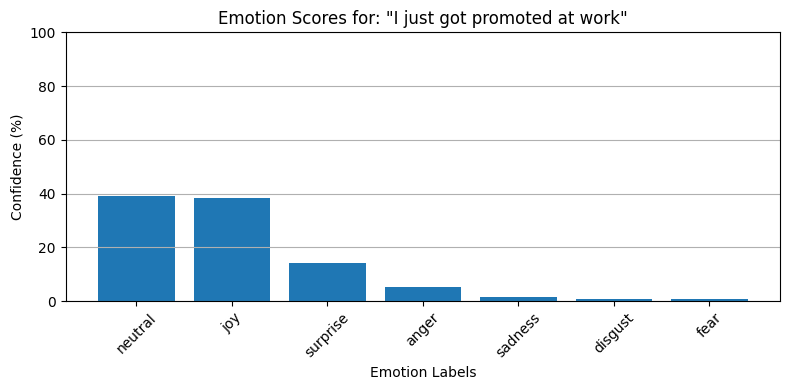

In [9]:
import matplotlib.pyplot as plt

# Selected 3rd sample from the results to visualize
example = results[3]
scores = example["response"]["all_scores"]
labels = [x["label"] for x in scores]
values = [x["score"] * 100 for x in scores]

# Plotting a bar chart for the selected sample result
plt.figure(figsize=(8, 4))
plt.bar(labels, values)
plt.title(f"Emotion Scores for: \"{example['input']}\"")
plt.ylabel("Confidence (%)")
plt.xlabel("Emotion Labels")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
